Initial velocity (v0): 80.28793334960938


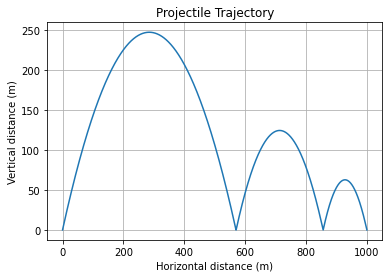

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def shoot(v0):
    # Simulation parameters
    dt = 0.01  # Time step
    bounces = 3  # Number of bounces
    target_distance = 1750  # Target distance

    # Constants
    rho0 = 2.5  # Density of the fluid (kg/m^3)
    g = 9.8  # Acceleration due to gravity (m/s^2)
    m = 12  # Mass of the sphere (kg)
    V0 = 1.5  # Initial volume of the sphere (m^3)
    theta = np.radians(60)  # Angle of launch (converted to radians)
    gamma = 5/3  # Adiabatic exponent

    # Derived variables
    p_fluid = rho0 * g * 1000  # Pressure at depth h = 1000 m
    p_sphere = p_fluid  # Pressure inside the sphere

    # Initial conditions
    x0 = 0  # Initial position (x-coordinate)
    y0 = 0  # Initial position (y-coordinate)
    vx0 = v0 * np.cos(theta)  # Initial velocity (x-component)
    vy0 = v0 * np.sin(theta)  # Initial velocity (y-component)

    # Arrays to store the trajectory
    x_array = [x0]
    y_array = [y0]

    # Leapfrog method
    x = x0
    y = y0
    vx = vx0
    vy = vy0
    t = 0
    bounce_count = 0

    while bounce_count < bounces:
        # Update position
        x += vx * dt
        y += vy * dt

        # Update velocity
        ax = 0  # No horizontal acceleration
        ay = -g  # Vertical acceleration due to gravity
        vx += ax * dt
        vy += ay * dt

        # Check if the sphere has reached the floor
        if y <= 0:
            # Update position and velocity
            y = 0
            vy = -vy/np.sqrt(2)  # Vertical velocity decreases by sqrt(2)
            vx =vx/np.sqrt(2)  # Horizontal velocity decreases by sqrt(2)

            # Count the bounce
            bounce_count += 1

        # Store the trajectory
        x_array.append(x)
        y_array.append(y)

        # Check if the sphere has reached the target distance
        if x >= target_distance:
            break

        # Update time
        t += dt

    return x, y_array[-1] ,x_array, y_array # Return the final x-coordinate and final y-coordinate

def bisection():
    # Bisection parameters
    v0_lower = 50  # Lower bound of initial velocity
    v0_upper = 100  # Upper bound of initial velocity
    tolerance = 0.001  # Tolerance for convergence

    while v0_upper - v0_lower > tolerance:
        v0_mid = (v0_lower + v0_upper) / 2

        x_mid, y_final,xa1,ya1 = shoot(v0_mid)

        if x_mid > 1000:
            v0_upper = v0_mid
        else:
            v0_lower = v0_mid

    return v0_mid

# Find the initial velocity using Bisection
v0 = bisection()
print("Initial velocity (v0):", v0)

# Simulate the trajectory with the found initial velocity
x_final, y_final,xa,ya = shoot(v0)

# Plot the trajectory
plt.plot(xa, ya)
plt.xlabel("Horizontal distance (m)")
plt.ylabel("Vertical distance (m)")
plt.title("Projectile Trajectory")
plt.grid(True)
plt.show()

